In [9]:
# load 
import pandas as pd
from matplotlib import pyplot as plt


In [10]:
data_path = "../data/AITEX_cleaned_02.csv"

df = pd.read_csv(data_path, sep=';')
df.pop("Material");

In [11]:
outputs_list = ["Tenacity (g/den)","Elongation (%)"]
remove = ["Count (dtex)"]
inputs_list = set(df.columns) - set(outputs_list) - set(remove)
inputs_list = list(inputs_list)



In [12]:
from functions.fitnn import fitnn
from functions.fitplot import fitplot

In [18]:
params = {
    "hidden": 2,
    "epochs": 20000,
    "neurons": 50,
    "weight_decay": 0.0001,
    "l2_weight": 0.0001,
    "lr": 0.01,
}

results = fitnn(df, inputs_list, outputs_list, params)

epoch 0, loss 0.9973
epoch 5000, loss 0.0113
epoch 10000, loss 0.0108
epoch 15000, loss 0.0107


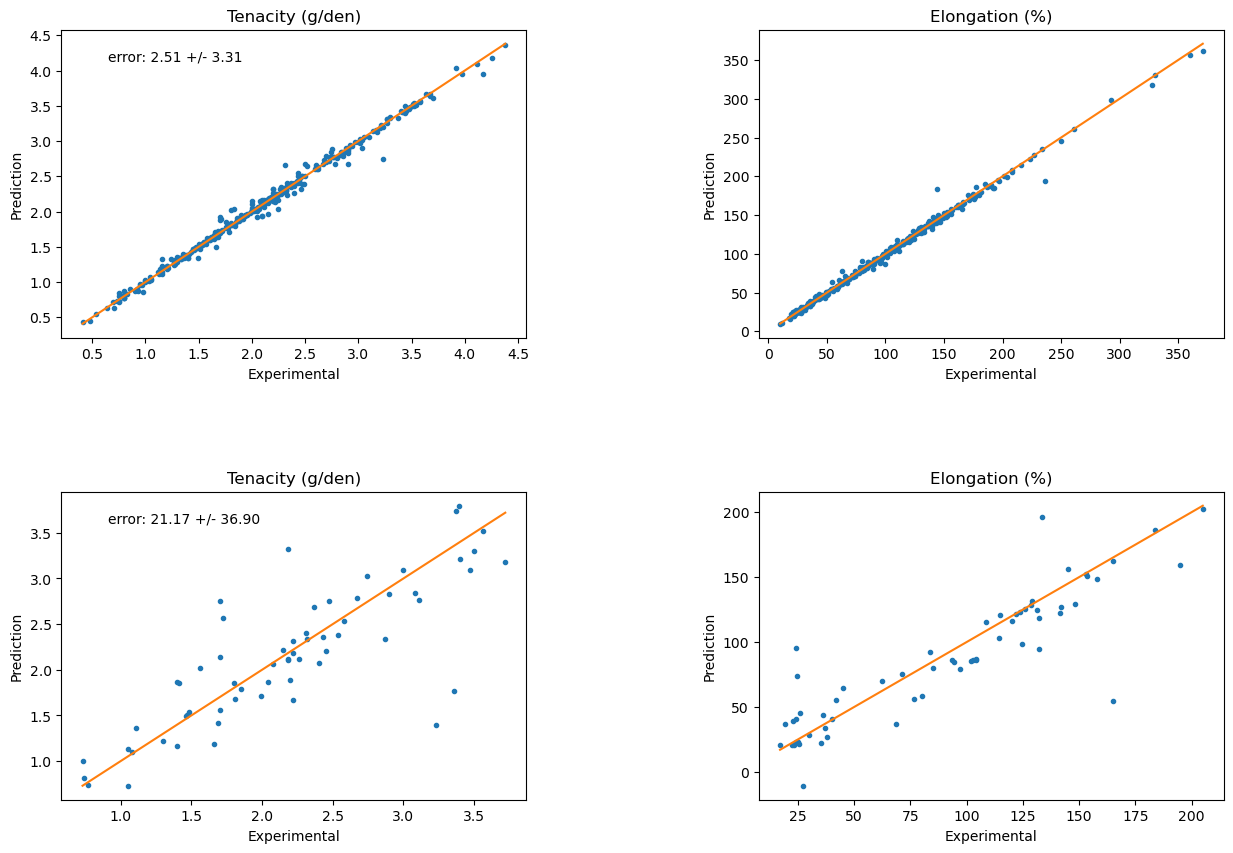

In [19]:
fitplot(results)

In [24]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim

# Define tu modelo de red

# Función objetivo para Optuna
def objective(trial):
    # Sugerir valores para los hiperparámetros
    hidden_dim = trial.suggest_int('hidden_dim', 2, 5)
    neurons = trial.suggest_int('neurons', 10, 100)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)

    results = fitnn(df, inputs_list, outputs_list, {
        "hidden": hidden_dim,
        "epochs": 2000,
        "neurons": neurons,
        "weight_decay": weight_decay,
        "l2_weight": weight_decay,
        "lr": lr,
    })

    return results["etest_mean"]


In [25]:

# Crear un estudio de Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)  # Número de pruebas

# Mejores hiperparámetros encontrados
print("Best hyperparameters:", study.best_params)
best_params = study.best_params

[I 2024-11-04 10:15:48,112] A new study created in memory with name: no-name-a0c473cc-67e2-4499-a80c-e1179918a54a


epoch 0, loss 0.999


[I 2024-11-04 10:15:49,345] Trial 0 finished with value: 23.679462730923465 and parameters: {'hidden_dim': 2, 'neurons': 70, 'lr': 0.008769058951581565, 'weight_decay': 3.5646654620842393e-05}. Best is trial 0 with value: 23.679462730923465.


epoch 0, loss 1.0271


[I 2024-11-04 10:15:50,322] Trial 1 finished with value: 51.34813404745294 and parameters: {'hidden_dim': 4, 'neurons': 10, 'lr': 0.0007257690366553039, 'weight_decay': 0.0001880346830188311}. Best is trial 0 with value: 23.679462730923465.


epoch 0, loss 1.0209


[I 2024-11-04 10:15:51,781] Trial 2 finished with value: 20.646971455569886 and parameters: {'hidden_dim': 2, 'neurons': 95, 'lr': 0.022106737211366762, 'weight_decay': 8.393275082098249e-05}. Best is trial 2 with value: 20.646971455569886.


epoch 0, loss 1.0176


[I 2024-11-04 10:15:52,780] Trial 3 finished with value: 53.21366860575083 and parameters: {'hidden_dim': 2, 'neurons': 36, 'lr': 3.9184150507578036e-05, 'weight_decay': 3.8204856215767505e-05}. Best is trial 2 with value: 20.646971455569886.


epoch 0, loss 1.0069


[I 2024-11-04 10:15:54,380] Trial 4 finished with value: 73.28440951936533 and parameters: {'hidden_dim': 5, 'neurons': 51, 'lr': 5.821263017207408e-05, 'weight_decay': 0.0002471511149853776}. Best is trial 2 with value: 20.646971455569886.


epoch 0, loss 1.0013


[I 2024-11-04 10:15:55,315] Trial 5 finished with value: 15.865187505069049 and parameters: {'hidden_dim': 2, 'neurons': 21, 'lr': 0.040751097564248544, 'weight_decay': 0.00013170761612343754}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0166


[I 2024-11-04 10:15:56,855] Trial 6 finished with value: 83.23995814821096 and parameters: {'hidden_dim': 5, 'neurons': 47, 'lr': 2.0228336957582594e-05, 'weight_decay': 1.2374553325310132e-05}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0076


[I 2024-11-04 10:15:58,567] Trial 7 finished with value: 65.0913012138849 and parameters: {'hidden_dim': 3, 'neurons': 89, 'lr': 1.7039801090671728e-05, 'weight_decay': 0.0002610792560409804}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0074


[I 2024-11-04 10:16:00,321] Trial 8 finished with value: 18.72701917946385 and parameters: {'hidden_dim': 4, 'neurons': 76, 'lr': 0.09150210385745129, 'weight_decay': 0.00017914949528135123}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0198


[I 2024-11-04 10:16:02,318] Trial 9 finished with value: 28.4676305087383 and parameters: {'hidden_dim': 5, 'neurons': 73, 'lr': 0.0008598455095513958, 'weight_decay': 0.0005515973072655082}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0688


[I 2024-11-04 10:16:03,248] Trial 10 finished with value: 24.05192287845228 and parameters: {'hidden_dim': 3, 'neurons': 11, 'lr': 0.005653145311827713, 'weight_decay': 0.0009569260788131241}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0004


[I 2024-11-04 10:16:04,429] Trial 11 finished with value: 25.33610775250369 and parameters: {'hidden_dim': 4, 'neurons': 31, 'lr': 0.09940104848781862, 'weight_decay': 0.00010665946841572927}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0056


[I 2024-11-04 10:16:05,904] Trial 12 finished with value: 20.643223601302388 and parameters: {'hidden_dim': 3, 'neurons': 70, 'lr': 0.08657604400154174, 'weight_decay': 0.00011072853961226064}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0239


[I 2024-11-04 10:16:07,048] Trial 13 finished with value: 34.101739910597104 and parameters: {'hidden_dim': 4, 'neurons': 25, 'lr': 0.029421688822908326, 'weight_decay': 0.0004374404430316868}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0035


[I 2024-11-04 10:16:08,698] Trial 14 finished with value: 18.03598820326689 and parameters: {'hidden_dim': 3, 'neurons': 82, 'lr': 0.0037715834043565706, 'weight_decay': 0.00017117454094286349}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0109


[I 2024-11-04 10:16:09,797] Trial 15 finished with value: 28.337671979649503 and parameters: {'hidden_dim': 2, 'neurons': 58, 'lr': 0.002692651352067933, 'weight_decay': 6.452760163205018e-05}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0009


[I 2024-11-04 10:16:11,463] Trial 16 finished with value: 20.298406039335806 and parameters: {'hidden_dim': 3, 'neurons': 84, 'lr': 0.0017342798848736444, 'weight_decay': 0.0001411146904082426}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0264


[I 2024-11-04 10:16:12,603] Trial 17 finished with value: 16.243539193187345 and parameters: {'hidden_dim': 2, 'neurons': 59, 'lr': 0.000337418546012874, 'weight_decay': 0.00035298130511047615}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0039


[I 2024-11-04 10:16:13,744] Trial 18 finished with value: 31.571136719702466 and parameters: {'hidden_dim': 2, 'neurons': 61, 'lr': 0.000309507432260899, 'weight_decay': 0.00032226402394009367}. Best is trial 5 with value: 15.865187505069049.


epoch 0, loss 1.0058


[I 2024-11-04 10:16:14,778] Trial 19 finished with value: 29.240443784973817 and parameters: {'hidden_dim': 2, 'neurons': 39, 'lr': 0.00021581450945708477, 'weight_decay': 0.0006539090177984741}. Best is trial 5 with value: 15.865187505069049.


Best hyperparameters: {'hidden_dim': 2, 'neurons': 21, 'lr': 0.040751097564248544, 'weight_decay': 0.00013170761612343754}


In [26]:
best_params

{'hidden_dim': 2,
 'neurons': 21,
 'lr': 0.040751097564248544,
 'weight_decay': 0.00013170761612343754}

epoch 0, loss 1.0132
epoch 5000, loss 0.0277
epoch 10000, loss 0.025
epoch 15000, loss 0.0241


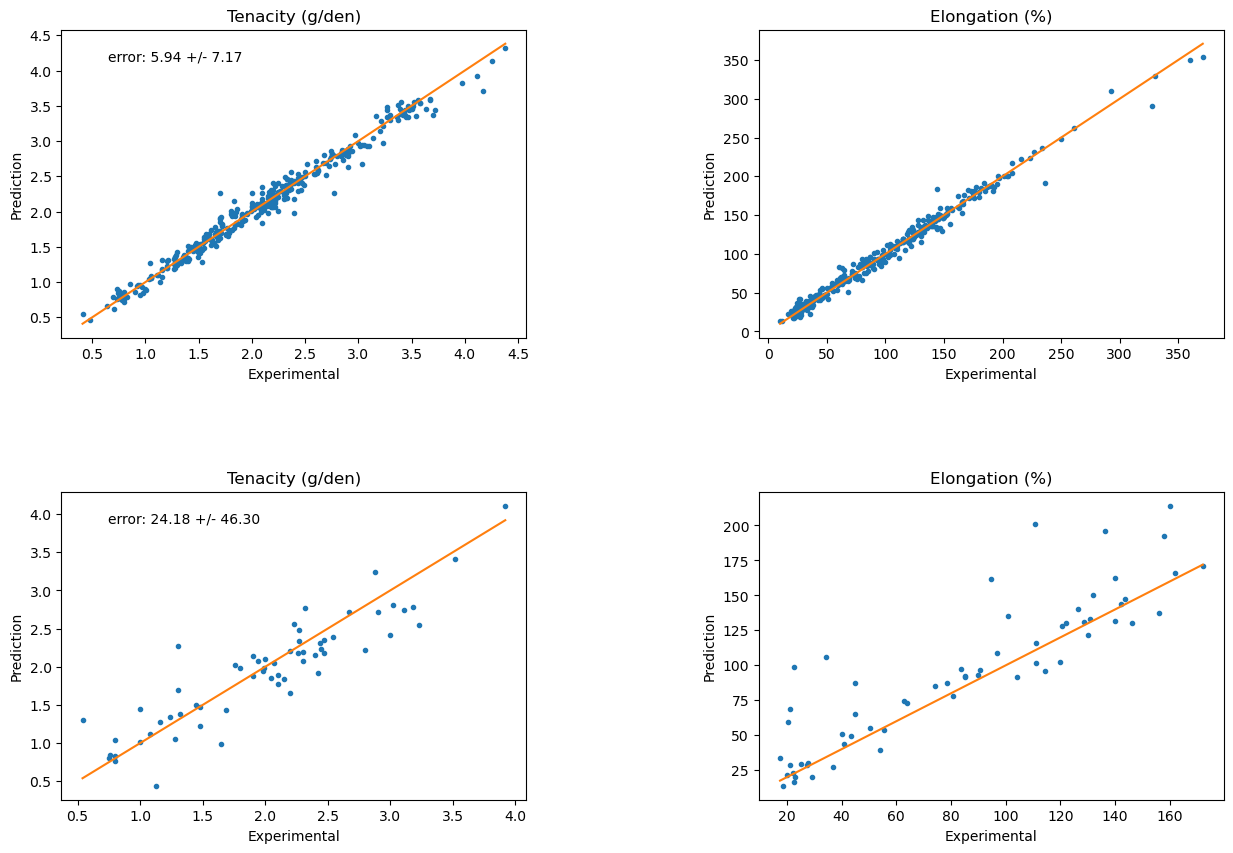

In [27]:
results_best = fitnn(df, inputs_list, outputs_list, {
    "hidden": best_params["hidden_dim"],
    "epochs": 20000,
    "neurons": best_params["neurons"],
    "weight_decay": best_params["weight_decay"],
    "l2_weight": best_params["weight_decay"],
    "lr": best_params["lr"],
})

fitplot(results_best)